In [1]:
from scipy.io import loadmat
import numpy as np
np.set_printoptions(formatter={'float': '{:0.5f}'.format})

import pandas as pd

# .mat 파일 로드
data = loadmat('pvLoadPriceData_test.mat')

# 데이터 추출 예시
# MATLAB 파일 내에 있는 변수 이름을 정확히 알아야 합니다. time, cloudyDay, clearDay, loadData, costData
time = data['time'].flatten()
solarData = data['clearDay'].flatten() * 10e3
loadData = data['loadData'][:, 2].flatten()
costData = data['costData'].flatten()

print("자료형:", type(time), "차원" , time.shape, )
print("자료형:", type(solarData), "차원" , solarData.shape, )
print("자료형:", type(loadData), "차원" , loadData.shape, )
print("자료형:", type(costData), "차원" , costData.shape, )

자료형: <class 'numpy.ndarray'> 차원 (228,)
자료형: <class 'numpy.ndarray'> 차원 (228,)
자료형: <class 'numpy.ndarray'> 차원 (228,)
자료형: <class 'numpy.ndarray'> 차원 (228,)


In [1]:
from scipy.io import loadmat
import numpy as np
np.set_printoptions(formatter={'float': '{:0.5f}'.format})

import pandas as pd

# .mat 파일 로드
data = loadmat('pvLoadPriceData_test.mat')

# 데이터 추출 예시
# MATLAB 파일 내에 있는 변수 이름을 정확히 알아야 합니다. time, cloudyDay, clearDay, loadData, costData
time = data['time'].flatten()
solarData = data['clearDay'].flatten()  # [Kw]
loadData = data['loadData'][:, 2].flatten() * 10e-5   # [W]
costData = data['costData'].flatten() * 300/3600

print("자료형:", type(time), "차원" , time.shape, )
print("자료형:", type(solarData), "차원" , solarData.shape, )
print("자료형:", type(loadData), "차원" , loadData.shape, )
print("자료형:", type(costData), "차원" , costData.shape, )

자료형: <class 'numpy.ndarray'> 차원 (228,)
자료형: <class 'numpy.ndarray'> 차원 (228,)
자료형: <class 'numpy.ndarray'> 차원 (228,)
자료형: <class 'numpy.ndarray'> 차원 (228,)


In [2]:
surplusData = solarData - loadData

In [3]:
surplusData

array([2.97846, 2.13643, 1.20646, -0.83575, -1.93219, -0.99139, -1.41668,
       -0.97139, -1.43668, -1.01139, -1.41668, -0.02172, -0.97139,
       -1.41668, -1.39668, -1.74509, -2.11872, -2.34968, -2.59008,
       -2.90201, -3.14759, -3.19891, -3.40810, -3.46725, -3.43847,
       -2.86387, -2.43554, -1.82561, -2.26617, -3.37933, -2.91719,
       -3.13187, -2.76547, -2.47008, -2.85783, -3.21082, -3.65110,
       -3.18895, -3.62234, -3.52906, -3.37691, -2.93370, -2.40724,
       -4.58532, -4.48575, -1.19634, -0.89487, -0.94917, -1.22704,
       -1.08650, -0.85590, -1.65358, -2.13788, -0.86716, -0.31976,
       1.40597, 2.67168, 2.45902, 1.59964, 4.07521, 0.52615, 2.51887,
       1.04856, -0.80204, -2.24023, -0.48326, 2.08157, 5.22699, 12.49574,
       7.21053, 2.06408, 2.54912, 4.46835, 7.21324, 7.41370, 14.90953,
       13.27052, 15.68649, 5.86721, 15.31251, 12.14217, 13.81600,
       16.06379, 21.88534, 18.62044, 12.30816, 22.65663, 26.02393,
       26.47813, 21.52732, 20.90958, 26.26

데이터 수: 228


15257.647032675568

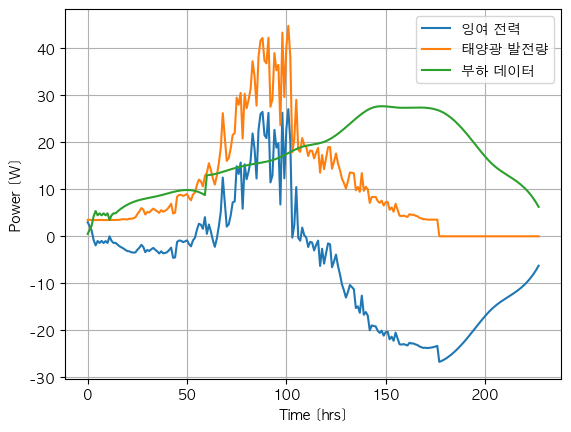

In [11]:
import matplotlib.pyplot as plt

print("데이터 수:", len(time))

plt.rcParams['font.family'] ='AppleGothic'
plt.rcParams['axes.unicode_minus'] =False

plt.subplot(1, 1, 1)
# Assuming Ppv, Pbatt, Pgrid, Pload are obtained from battSolarOptimize
plt.plot(range(len(time)), surplusData, range(len(time)), solarData, range(len(time)), loadData)
plt.grid(True)
plt.legend(['잉여 전력', '태양광 발전량', '부하 데이터', '기준선'])
plt.xlabel('Time [hrs]')
plt.ylabel('Power [W]')

totalCost = np.cumsum((loadData - solarData) * costData)
totalCost[-1]

15257.647032675568

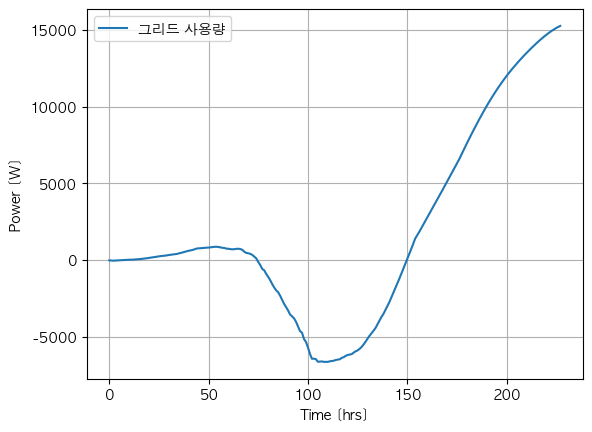

In [10]:
totalCost = np.cumsum((loadData - solarData) * costData)

plt.subplot(1, 1, 1)
# Assuming Ppv, Pbatt, Pgrid, Pload are obtained from battSolarOptimize
plt.plot(range(len(time)), totalCost)
plt.grid(True)
plt.legend(['그리드 사용량'])
plt.xlabel('Time [hrs]')
plt.ylabel('Power [W]')

totalCost[-1]